### PLANIFICACION MINERA CON INCERTIDUMBRE

In [1]:
import scipy.spatial as sps
from scipy.stats import norm
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import os

#### Directorio

In [2]:
simdir= './SIM/'
#os.mkdir(simdir)

#### Formato

In [3]:
def demo(sty):
    mpl.style.use(sty)

demo('default')
#demo('seaborn')

def setfs ( s ):
    font = {'family' : 'Palatino Linotype',
            'weight' : 'normal',
            'size'   : s}
    mpl.rc('font', **font)
    
setfs ( 11 )  

#### Load Data

In [4]:
with open(simdir +'C9_Banco_250.dat','r') as f:   #Archivo con leyes reportadas del Poligono de los modelos de simulacion
    f.readline()
    ncols = int(f.readline())

In [5]:
data = pd.read_csv(simdir +'C9_Banco_250.dat',header=None,skiprows=ncols+2,sep='\s+',na_values=-999)
print("Data loaded, size: ",data.values.shape,flush=True)
data.rename(columns={0:'Sim'}, inplace=True)
data.head()

Data loaded, size:  (200, 1)


,Sim
0,0.555057
1,0.684345
2,0.685340
3,0.966607
4,0.954784


In [6]:
data=data.values                           # .Values transforma la dataframe.
ndata=data.shape[0]                        # Numeros de datos en el archivo de muestras.
y=data[:,0]                                # leyes de las Simulaciones.
min=np.min(y)
print("Valor Minimo:","{0:.3f}".format(min))
max=np.max(y)
print("Valor Maximo:","{0:.3f}".format(max))
ndata                                        # Numero de simulaciones.

Valor Minimo: 0.541
Valor Maximo: 1.485


200

#### Analisis de la ley de Caseron o Poligono.

In [7]:
E_type = np.mean(y,axis=0)              # Ley media de las simulaciones.
Var= np.var(y,axis=0)                   # varianza de las simulaciones.
Desv=np.std(y,axis=0)                   # Desviacion estandar de las simulaciones.

Ley_OK=1.06                             # Ley de Caseron o Poligono por Kriging Ordinario.
Ley_OK_dsv=(1.06-E_type)/Desv           # Ley de Caseron o Poligono por Kriging Ordinario standarizado.

print('Ley Reportada OK',"{0:.3f}".format(Ley_OK))          # Modelo caso base Kriging Ordinario.
print('Ley estandarizada',"{0:.3f}".format(Ley_OK_dsv))
print('Ley media (Etype)',"{0:.3f}".format(E_type))
print('Varianza',"{0:.2f}".format(Var))
print('Desviacion estandar',"{0:.2f}".format(Desv))

Ley Reportada OK 1.060
Ley estandarizada 1.127
Ley media (Etype) 0.871
Varianza 0.03
Desviacion estandar 0.17


#### Vizualizacion de la leyes de Simulacion versus ley Programa (OK)

- Grafico de disperción

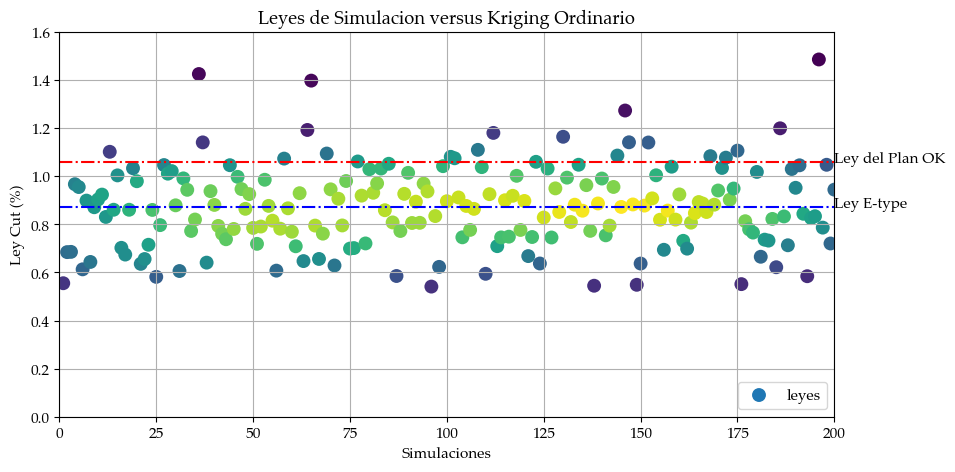

In [8]:
from scipy.stats import gaussian_kde

plt.figure(dpi=100,figsize=(10,5))
x= np.linspace(1,200,num=ndata )
y=data[:,0]

# Calculo de desnsidad de Puntos
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x,y, c=z , s=100 , edgecolor='' , label='leyes')
plt.plot([0,ndata ],[Ley_OK,Ley_OK],'r-.')
plt.text(ndata,Ley_OK,'Ley del Plan OK')
plt.plot([0,ndata ],[E_type,E_type],'b-.')
plt.text(ndata,E_type,'Ley E-type')
plt.axis([0, 200, 0.0, 1.6])
plt.title('Leyes de Simulacion versus Kriging Ordinario')
plt.ylabel('Ley Cut (%)')
plt.xlabel('Simulaciones')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("Leyes de Simulacion versus Kriging Ordinario.png", bbox_inches="tight", dpi=300)

#### Ley Media de las Simulaciones Acumuladas.

In [9]:
ley_acum=[]

for i in range(ndata):
    ley=np.mean(y[0:(i+1)])              # ley promedio Sim.
    ley_acum.append(ley)         

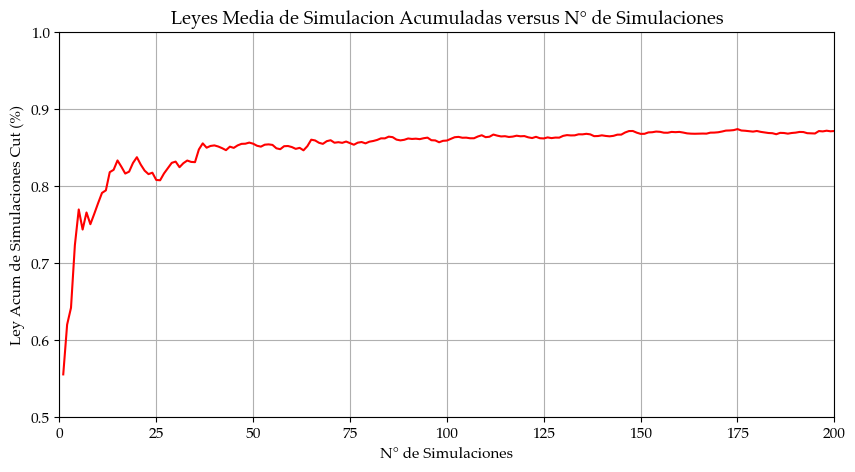

In [10]:
plt.figure(dpi=100,figsize=(10,5))
plt.plot(x,ley_acum , color= 'r')
plt.title('Leyes Media de Simulacion Acumuladas versus N° de Simulaciones')
plt.ylabel('Ley Acum de Simulaciones Cut (%)')
plt.xlabel('N° de Simulaciones')
plt.axis([0, 200, 0.5, 1.0])       # Limited del Grafico.
plt.grid()
plt.savefig("Leyes Media de Simulacion Acumuladas versus N° de Simulaciones.png", bbox_inches="tight", dpi=300)

#### Distribucion Normal Gaussiana

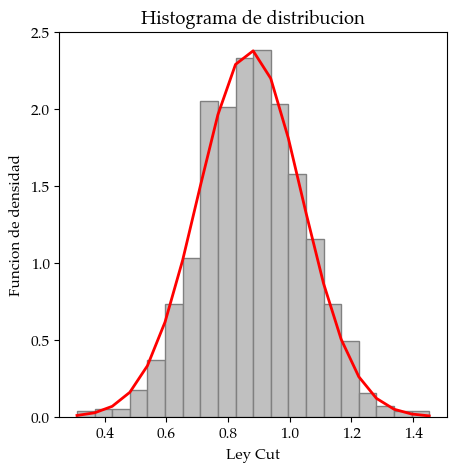

In [11]:
mu, sigma = E_type , Desv                     # media y desviacion estandar 
s= np.random.normal(mu,sigma, 1000)           # creando muestra de datos

plt.figure(dpi=100,figsize=(5,5))
yy, xx, ignorar = plt.hist(s, 20,color= 'silver', density=True ,histtype='bar', edgecolor='gray')
plt.plot(xx, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(xx-mu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.title('Histograma de distribucion')
plt.ylabel('Funcion de densidad')
plt.xlabel('Ley Cut')
plt.show()

In [12]:
import pandas as pd
import scipy.stats as ss

d, pvalor = ss.kstest(y,"norm",args=(E_type , Desv))

# queremos confianza al 99%             #Performs the (one sample or two samples) Kolmogorov-Smirnov test for goodness of fit.
# nivel de significación, que es 1 - NivelConfianza/100

if pvalor < 0.01:
    print("No se ajusta a una normal, pvalor:","{0:.3f}".format(pvalor))
else:
    print("Se puede ajustar a una normal, pvalor:","{0:.3f}".format(pvalor))
    
# Si muestra que se puede ajustar a una normal, simplemente que no se puede rechazar la hipótesis de partida (que sea normal),
#  pero no confirma que sea normal.

Se puede ajustar a una normal, pvalor: 0.997


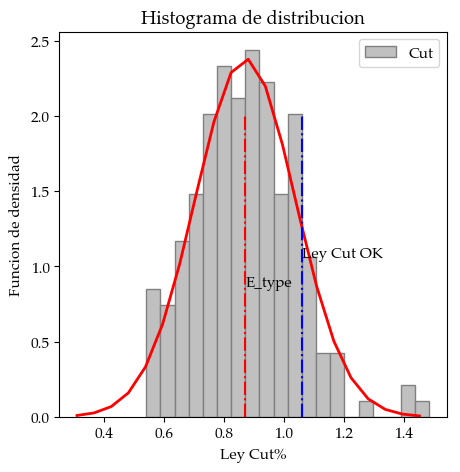

In [13]:
plt.figure(dpi=100,figsize=(5,5))                                   #histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
y1, x1, ignorar =plt.hist(y, 20 , color= 'silver' ,label='Cut',density=True ,histtype='bar', edgecolor='gray' )
plt.plot(xx, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(xx-mu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.plot([Ley_OK,Ley_OK],[0,2],'b-.')
plt.text(Ley_OK,Ley_OK,'Ley Cut OK')
plt.plot([E_type,E_type],[0,2],'r-.')
plt.text(E_type,E_type,'E_type')
plt.legend(loc="upper right")
plt.title('Histograma de distribucion')
plt.ylabel('Funcion de densidad')
plt.xlabel('Ley Cut%')
plt.savefig("Histograma de distribucion.png", bbox_inches="tight", dpi=300)
plt.show()

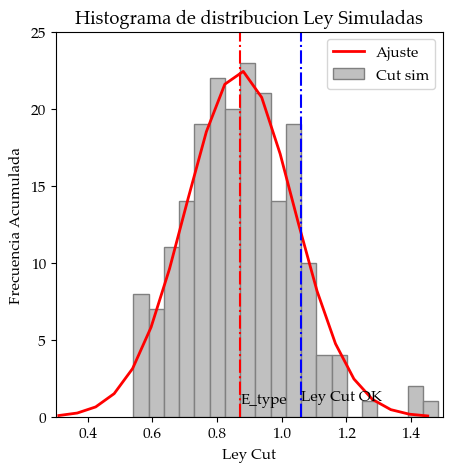

In [14]:
plt.figure(dpi=100,figsize=(5,5))
y2, x2, ignorar =plt.hist(y, 20 , color= 'silver' ,label='Cut sim',density=None ,histtype='bar', edgecolor='gray' )
plt.plot(xx, 1*(np.max(y2)/np.max(y1))/(sigma*np.sqrt(2*np.pi))*np.exp(-(xx-mu)**2/(2*sigma**2)),linewidth=2,color='r', label='Ajuste')
plt.plot([Ley_OK,Ley_OK],[0,30],'b-.')
plt.text(Ley_OK,Ley_OK,'Ley Cut OK')
plt.plot([E_type,E_type],[0,30],'r-.')
plt.text(E_type,E_type,'E_type')
plt.legend(loc="upper right")
plt.title('Histograma de distribucion Ley Simuladas')
plt.xlabel('Ley Cut%')
plt.ylabel('Frecuencia Acumulada')
plt.axis([0.3, 1.5, 0.0, 25])
plt.show()

#### Transformacion a valores Normalizados (0,1)

In [15]:
def nscore( x ):                                             # Normalizacion de los datos mu, sigma = 0,1         
    k = np.argsort(np.argsort(x))
    n = len(x)
    q = norm.ppf(np.linspace(0.5/n,1-0.5/n,n))
    return q[k]

z=nscore(y)

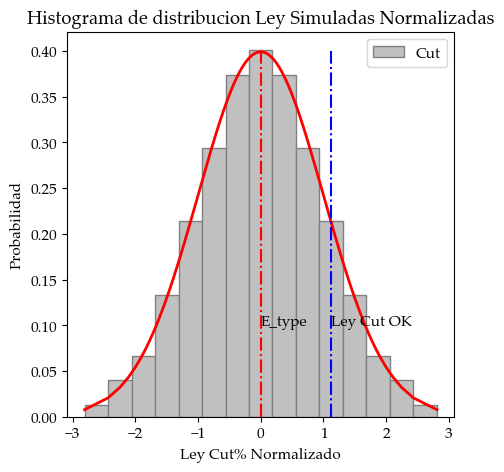

In [19]:
mu, sigma = 0 , 1                                            # Parametros de Distribucion Normal

plt.figure(dpi=100,figsize=(5,5))
plt.hist(z, 15 , color= 'silver' ,label='Cut' , density=True ,edgecolor='gray',cumulative=None)
k=z[np.argsort(z)]                                        # Ordenamiento de los datos
plt.plot(k, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(k-mu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.plot([Ley_OK_dsv,Ley_OK_dsv],[0,0.4],'b-.')
plt.text(Ley_OK_dsv,0.1,'Ley Cut OK')
plt.plot([0,0],[0,0.4],'r-.')
plt.text(0,0.1,'E_type')
plt.legend(loc="upper right")
plt.title('Histograma de distribucion Ley Simuladas Normalizadas')
plt.xlabel('Ley Cut% Normalizado')
plt.ylabel('Probabilidad')
plt.savefig("Histograma de distribucion Ley Simuladas Normalizadas.png", bbox_inches="tight", dpi=300)
plt.show()

#### Probabilidad de Cumplimiento

In [17]:
Prob_ley=norm.cdf(Ley_OK_dsv,0,1)
print('Probabilidad que la ley del poligono 1.06% Cut sea menor, es',"{0:.2f}".format(Prob_ley))
print('Probabilidad que la ley del poligono 1.06% Cut sea mayor, es',"{0:.2f}".format(1-Prob_ley))

Probabilidad que la ley del poligono 1.06% Cut sea menor, es 0.87
Probabilidad que la ley del poligono 1.06% Cut sea mayor, es 0.13


In [18]:
Prob_ley=norm.cdf(Ley_OK,E_type,Desv)
print('Probabilidad que la ley del caseron 1.06% Cut sea menor, es',"{0:.2f}".format(Prob_ley))
print('Probabilidad que la ley del caseron 1.06% Cut sea mayor, es',"{0:.2f}".format(1-Prob_ley))

Probabilidad que la ley del caseron 1.06% Cut sea menor, es 0.87
Probabilidad que la ley del caseron 1.06% Cut sea mayor, es 0.13


### Fin